<a href="https://colab.research.google.com/github/MArtistForLife/SMOTE/blob/main/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

It basically is a kind of upscaling.

SMOTE tries to join 2 nearest data points together, and keep doing that while creating new data points in that line between nearby data points. So now the data being created also has variance. (Helpful if the original dataset has little variance.)

In [4]:
from sklearn.datasets import make_classification
# helps create multi-class or binary classification dataset

In [7]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)
# n_redundant = 0 means no repeating values, n_features = 2 makes 2D diagram
# n_clusters_per_class = 1 (more on that later)
# weights = [0.90] means that one class should be 90% more with respect to output

In [11]:
import pandas as pd

df1=pd.DataFrame(x,columns=['f1','f2']) # feature 1 and feature 2
df2=pd.DataFrame(y,columns=['target'])
# the variable at the beginning (y) is for with respect to which variable
# makes sense bc y is the output variable

final_df=pd.concat([df1,df2],axis=1)
# concatenate to make one dataset

final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [13]:
final_df['target'].value_counts()
# definitely an imbalanced dataset

,count
target,
0,900
1,100


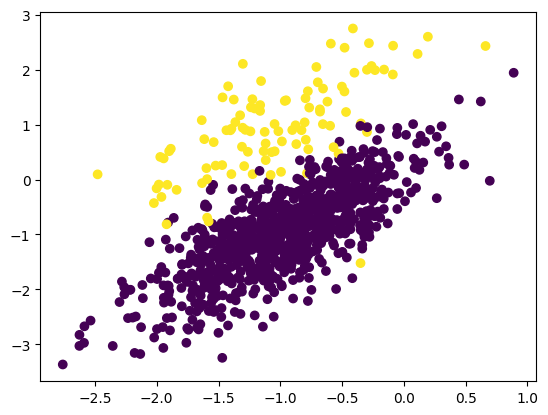

In [15]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
# the structure is: plt.scatter(x-axis stuff, y-axis stuff, how to categorize)
# in this case, each class is from the categorical variable 'target', so
# we categorize by color

In [17]:
!pip install imblearn # not by default existing otherwise

In [18]:
from imblearn.over_sampling import SMOTE

In [20]:
## transform the dataset
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])
# the new x,y will be the SMOTE version of both features and then categorized
# again by target (so by color)

In [21]:
x.shape
# the minority 100 has been scaled up to 900, making a total of 1800 data points

(1800, 2)

In [27]:
y.shape
# this just gives a total with the funky lonely comma

(1800,)

In [28]:
len(y[y==0])

900

In [29]:
len(y[y==1])

900

In [31]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1) # concatenate the new x and y as 1 dataset

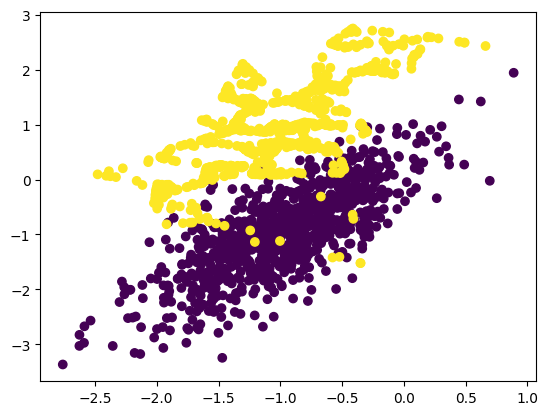

In [32]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])
# ta-dah!! all the nearby yellow points were connected with a line via SMOTE,
# and on each line new data points were made, so now the dataset is not imbalanced :)